In [39]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from itertools import chain
%matplotlib inline
plt.style.use('ggplot')

In [6]:
df = pd.read_csv('bgg_db_2017_03.csv', encoding='latin1')

In [15]:
df.describe()

,rank,game_id,min_players,max_players,avg_time,min_time,max_time,year,avg_rating,geek_rating,num_votes,age,owned,weight,avg_max_players,avg_players
count,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4.999000e+03,4999.000000
mean,2500.000000,73337.717744,2.037608,5.271054,105.979196,88.091018,105.627125,1995.700140,6.925968,6.062666,1640.716343,10.269254,2441.998400,2.344761,5.271054e+00,3.654331
std,1443.231328,68321.830147,0.683500,15.779035,391.112517,318.225816,391.156158,146.085142,0.566093,0.479210,3970.694088,3.331780,5277.386973,0.801572,3.482008e-13,7.924554
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3000.000000,5.733420,5.624360,45.000000,0.000000,24.000000,0.000000,5.271054e+00,0.000000
25%,1250.500000,8055.000000,2.000000,4.000000,30.000000,30.000000,30.000000,2002.000000,6.486580,5.703330,221.000000,8.000000,479.000000,1.733300,5.271054e+00,2.500000
50%,2500.000000,41749.000000,2.000000,4.000000,60.000000,45.000000,60.000000,2009.000000,6.873020,5.880680,491.000000,10.000000,936.000000,2.292700,5.271054e+00,3.000000
75%,3749.500000,142071.000000,2.000000,6.000000,102.500000,90.000000,100.000000,2013.000000,7.307300,6.262845,1320.000000,12.000000,2179.500000,2.884450,5.271054e+00,4.000000
max,4999.000000,216201.000000,9.000000,999.000000,17280.000000,17280.000000,17280.000000,2018.000000,9.352860,8.474110,66826.000000,42.000000,93975.000000,4.904800,5.271054e+00,500.500000


In [7]:
df.head()

,rank,bgg_url,game_id,names,min_players,max_players,avg_time,min_time,max_time,year,avg_rating,geek_rating,num_votes,image_url,age,mechanic,owned,category,designer,weight
0,1,https://boardgamegeek.com/boardgame/161936/pan...,161936,Pandemic Legacy: Season 1,2,4,60,60,60,2015,8.66514,8.47411,16385,//cf.geekdo-images.com/images/pic2452831.png,13,"Action Point Allowance System, Co-operative Pl...",27059,"Environmental, Medical","Rob Daviau, Matt Leacock",2.8067
1,2,https://boardgamegeek.com/boardgame/182028/thr...,182028,Through the Ages: A New Story of Civilization,2,4,240,180,240,2015,8.76347,8.31014,6481,//cf.geekdo-images.com/images/pic2663291.jpg,14,"Action Point Allowance System, Auction/Bidding...",8810,"Card Game, Civilization, Economic",Vlaada Chvátil,4.2953
2,3,https://boardgamegeek.com/boardgame/12333/twil...,12333,Twilight Struggle,2,2,180,180,180,2005,8.35709,8.22067,26641,//cf.geekdo-images.com/images/pic361592.jpg,13,"Area Control / Area Influence, Campaign / Batt...",36086,"Modern Warfare, Political, Wargame","Ananda Gupta, Jason Matthews",3.5280
3,4,https://boardgamegeek.com/boardgame/120677/ter...,120677,Terra Mystica,2,5,150,60,150,2012,8.29344,8.15103,23065,//cf.geekdo-images.com/images/pic1356616.jpg,12,"Route/Network Building, Variable Phase Order, ...",26683,"Civilization, Economic, Fantasy, Territory Bui...","Jens Drögemüller, Helge Ostertag",3.9374
4,5,https://boardgamegeek.com/boardgame/187645/sta...,187645,Star Wars: Rebellion,2,4,240,180,240,2016,8.55971,8.13865,7581,//cf.geekdo-images.com/images/pic2737530.png,14,"Area Control / Area Influence, Area Movement, ...",12803,"Movies / TV / Radio theme, Science Fiction, Wa...",Corey Konieczka,3.5600


In [18]:
df.sort_values(by='avg_rating',ascending=False).head(5)

,rank,bgg_url,game_id,names,min_players,max_players,avg_time,min_time,max_time,year,...,num_votes,image_url,age,mechanic,owned,category,designer,weight,avg_max_players,avg_players
3197,3198,https://boardgamegeek.com/boardgame/186751/myt...,186751,Mythic Battles: Pantheon,1,4,90,45,90,2017,...,245,//cf.geekdo-images.com/images/pic3235453.jpg,14,"Area Movement, Campaign / Battle Card Driven, ...",236,"Ancient, Card Game, Dice, Miniatures, Mytholog...",Benoit Vogt,2.9375,5.271054,2.5
20,21,https://boardgamegeek.com/boardgame/174430/glo...,174430,Gloomhaven,1,4,150,90,150,2017,...,2481,//cf.geekdo-images.com/images/pic2437871.jpg,12,"Co-operative Play, Grid Movement, Hand Managem...",4125,"Adventure, Economic, Exploration, Fantasy, Fig...",Isaac Childres,3.7151,5.271054,2.5
4910,4911,https://boardgamegeek.com/boardgame/198985/day...,198985,Day Night Z,1,4,150,60,150,2017,...,95,//cf.geekdo-images.com/images/pic3230402.png,14,"Area Movement, Campaign / Battle Card Driven, ...",47,"Adventure, Exploration, Horror, Miniatures, Tr...",none,3.8333,5.271054,2.5
152,153,https://boardgamegeek.com/boardgame/55690/king...,55690,Kingdom Death: Monster,1,6,60,30,60,2015,...,1868,//cf.geekdo-images.com/images/pic2931007.jpg,17,"Co-operative Play, Dice Rolling, Grid Movement...",2535,"Adventure, Fantasy, Horror, Mature / Adult, Mi...",Adam Poots,4.2085,5.271054,3.5
3892,3893,https://boardgamegeek.com/boardgame/178896/las...,178896,Last Blitzkrieg,2,4,960,180,960,2016,...,71,//cf.geekdo-images.com/images/pic3387407.jpg,13,"Dice Rolling, Hex-and-Counter, Simulation",349,"Wargame, World War II",Dean Essig,3.6667,5.271054,3.0


In [20]:
df.nlargest(5,'avg_rating')

,rank,bgg_url,game_id,names,min_players,max_players,avg_time,min_time,max_time,year,...,num_votes,image_url,age,mechanic,owned,category,designer,weight,avg_max_players,avg_players
3197,3198,https://boardgamegeek.com/boardgame/186751/myt...,186751,Mythic Battles: Pantheon,1,4,90,45,90,2017,...,245,//cf.geekdo-images.com/images/pic3235453.jpg,14,"Area Movement, Campaign / Battle Card Driven, ...",236,"Ancient, Card Game, Dice, Miniatures, Mytholog...",Benoit Vogt,2.9375,5.271054,2.5
20,21,https://boardgamegeek.com/boardgame/174430/glo...,174430,Gloomhaven,1,4,150,90,150,2017,...,2481,//cf.geekdo-images.com/images/pic2437871.jpg,12,"Co-operative Play, Grid Movement, Hand Managem...",4125,"Adventure, Economic, Exploration, Fantasy, Fig...",Isaac Childres,3.7151,5.271054,2.5
4910,4911,https://boardgamegeek.com/boardgame/198985/day...,198985,Day Night Z,1,4,150,60,150,2017,...,95,//cf.geekdo-images.com/images/pic3230402.png,14,"Area Movement, Campaign / Battle Card Driven, ...",47,"Adventure, Exploration, Horror, Miniatures, Tr...",none,3.8333,5.271054,2.5
152,153,https://boardgamegeek.com/boardgame/55690/king...,55690,Kingdom Death: Monster,1,6,60,30,60,2015,...,1868,//cf.geekdo-images.com/images/pic2931007.jpg,17,"Co-operative Play, Dice Rolling, Grid Movement...",2535,"Adventure, Fantasy, Horror, Mature / Adult, Mi...",Adam Poots,4.2085,5.271054,3.5
3892,3893,https://boardgamegeek.com/boardgame/178896/las...,178896,Last Blitzkrieg,2,4,960,180,960,2016,...,71,//cf.geekdo-images.com/images/pic3387407.jpg,13,"Dice Rolling, Hex-and-Counter, Simulation",349,"Wargame, World War II",Dean Essig,3.6667,5.271054,3.0


In [9]:
df2 = df[df['num_votes'] > 1000]
df2.nlargest(5,'avg_rating')

,rank,bgg_url,game_id,names,min_players,max_players,avg_time,min_time,max_time,year,avg_rating,geek_rating,num_votes,image_url,age,mechanic,owned,category,designer,weight
20,21,https://boardgamegeek.com/boardgame/174430/glo...,174430,Gloomhaven,1,4,150,90,150,2017,9.23599,7.93041,2481,//cf.geekdo-images.com/images/pic2437871.jpg,12,"Co-operative Play, Grid Movement, Hand Managem...",4125,"Adventure, Economic, Exploration, Fantasy, Fig...",Isaac Childres,3.7151
152,153,https://boardgamegeek.com/boardgame/55690/king...,55690,Kingdom Death: Monster,1,6,60,30,60,2015,8.96679,7.28554,1868,//cf.geekdo-images.com/images/pic2931007.jpg,17,"Co-operative Play, Dice Rolling, Grid Movement...",2535,"Adventure, Fantasy, Horror, Mature / Adult, Mi...",Adam Poots,4.2085
1,2,https://boardgamegeek.com/boardgame/182028/thr...,182028,Through the Ages: A New Story of Civilization,2,4,240,180,240,2015,8.76347,8.31014,6481,//cf.geekdo-images.com/images/pic2663291.jpg,14,"Action Point Allowance System, Auction/Bidding...",8810,"Card Game, Civilization, Economic",Vlaada Chvátil,4.2953
0,1,https://boardgamegeek.com/boardgame/161936/pan...,161936,Pandemic Legacy: Season 1,2,4,60,60,60,2015,8.66514,8.47411,16385,//cf.geekdo-images.com/images/pic2452831.png,13,"Action Point Allowance System, Co-operative Pl...",27059,"Environmental, Medical","Rob Daviau, Matt Leacock",2.8067
4,5,https://boardgamegeek.com/boardgame/187645/sta...,187645,Star Wars: Rebellion,2,4,240,180,240,2016,8.55971,8.13865,7581,//cf.geekdo-images.com/images/pic2737530.png,14,"Area Control / Area Influence, Area Movement, ...",12803,"Movies / TV / Radio theme, Science Fiction, Wa...",Corey Konieczka,3.5600


In [44]:
df3 = df2[['names','avg_rating','num_votes']].sort_values(by='num_votes',ascending=False)
df3 = df3.set_index('names')
df3

,avg_rating,num_votes
names,,
Catan,7.26930,66826
Carcassonne,7.43566,66218
Pandemic,7.67368,61298
Dominion,7.70298,55245
7 Wonders,7.83965,50815
Agricola,8.06075,47754
Ticket to Ride,7.48455,47654
Puerto Rico,8.09437,47307
Small World,7.36109,42566


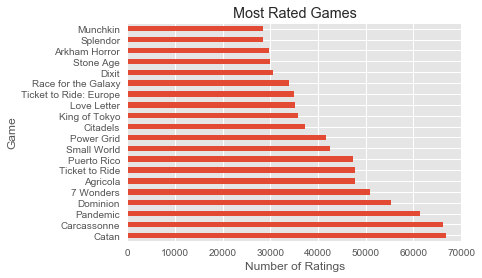

In [45]:
df3['num_votes'][:20].plot(kind='barh')
plt.xlabel('Number of Ratings')
plt.ylabel('Game')
plt.title("Most Rated Games")

In [55]:
best_rated = df2[['names','avg_rating','num_votes','weight']].sort_values(by='avg_rating',ascending=False)
best_rated = best_rated.set_index('names')
best_rated

,avg_rating,num_votes,weight
names,,,
Gloomhaven,9.23599,2481,3.7151
Kingdom Death: Monster,8.96679,1868,4.2085
Through the Ages: A New Story of Civilization,8.76347,6481,4.2953
Pandemic Legacy: Season 1,8.66514,16385,2.8067
Star Wars: Rebellion,8.55971,7581,3.5600
Arkham Horror: The Card Game,8.42524,4175,3.0252
Mechs vs. Minions,8.41385,4175,2.4598
War of the Ring (Second Edition),8.38386,6127,3.9896
Terraforming Mars,8.36395,6506,3.2618


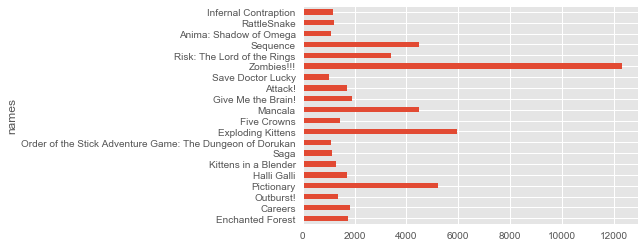

In [49]:
worst_rated = df2[['names','avg_rating','num_votes']].sort_values(by='avg_rating',ascending=True)
worst_rated = worst_rated.set_index('names')
worst_rated['num_votes'][:20].plot(kind='barh')

In [52]:
df[df['names'] == 'Zombies!!!']

,rank,bgg_url,game_id,names,min_players,max_players,avg_time,min_time,max_time,year,avg_rating,geek_rating,num_votes,image_url,age,mechanic,owned,category,designer,weight
3728,3729,https://boardgamegeek.com/boardgame/2471/zombies,2471,Zombies!!!,2,6,60,60,60,2001,5.88023,5.70313,12304,//cf.geekdo-images.com/images/pic2290485.jpg,12,"Dice Rolling, Grid Movement, Hand Management, ...",17363,"Exploration, Fighting, Horror, Miniatures, Mov...","Todd Breitenstein, Kerry Breitenstein",1.6209


In [10]:
df['avg_max_players'] = df['max_players'].mean()
df['avg_max_players'].value_counts()

5.271054    4999
Name: avg_max_players, dtype: int64

In [12]:
df['avg_players'] = (df['min_players'] + df['max_players']) / 2
df['avg_players'].value_counts()

3.0      1273
2.0       900
3.5       771
4.0       731
2.5       319
4.5       280
5.0       181
1.5       149
1.0        92
5.5        70
6.0        61
6.5        28
7.0        26
8.0        14
50.5       12
0.0        12
7.5        12
8.5         8
11.0        6
50.0        5
9.0         5
9.5         5
11.5        5
10.0        4
51.0        4
16.0        3
12.0        3
17.0        3
10.5        2
17.5        2
51.5        2
19.5        2
13.0        2
500.5       1
52.5        1
18.0        1
40.0        1
27.0        1
14.0        1
36.5        1
Name: avg_players, dtype: int64

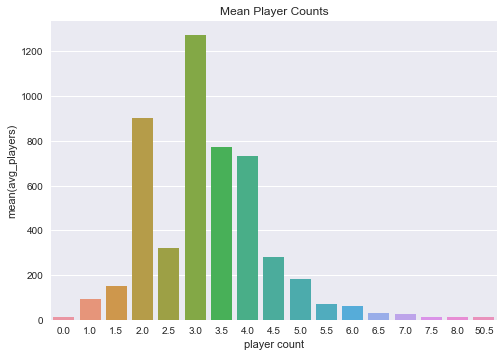

In [14]:
df['avg_players'] = (df['min_players'] + df['max_players']) / 2
player_counts = df['avg_players'].value_counts()
player_counts = player_counts[player_counts > 10] # trim rare occurences
ax = sns.barplot(x=player_counts.index, y = player_counts)
sns.plt.title('Mean Player Counts')
ax.set(xlabel='player count')
plt.show()